In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading

In [ ]:
df  = pd.read_csv('/content/air_quality_for_regression.csv')


# Data Exploration

In [ ]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6


In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000


# Data Cleaning

In [ ]:
df.drop(columns=['NMHC(GT)'] , inplace=True)

In [ ]:
def remove_outliers(df):
  """
    parameters : df => data frame
    this funcion removes outliers from the whole df

  """
  for column in df.columns:
    print("working on column : ",column)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - iqr * 1.5, q3 + iqr * 1.5
    print("lower : ", lower )
    print("upper : ", upper )

    df[column].clip(lower = lower , upper = upper,inplace=True )
    if column != "T":
      df[column] = df[column].apply(lambda x : max(x , 0.1))

    print("--------------------------------------------")


In [ ]:
remove_outliers(df)

working on column :  CO(GT)
lower :  -2.4
upper :  5.6
--------------------------------------------
working on column :  PT08.S1(CO)
lower :  471.0
upper :  1671.0
--------------------------------------------
working on column :  C6H6(GT)
lower :  -10.399999999999999
upper :  28.0
--------------------------------------------
working on column :  PT08.S2(NMHC)
lower :  120.0
upper :  1696.0
--------------------------------------------
working on column :  NOx(GT)
lower :  -301.0
upper :  635.0
--------------------------------------------
working on column :  PT08.S3(NOx)
lower :  152.5
upper :  1444.5
--------------------------------------------
working on column :  NO2(GT)
lower :  -67.0
upper :  253.0
--------------------------------------------
working on column :  PT08.S4(NO2)
lower :  469.5
upper :  2377.5
--------------------------------------------
working on column :  PT08.S5(O3)
lower :  -132.5
upper :  2087.5
--------------------------------------------
working on column :  T


<ipython-input-47-be95af832daa>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].clip(lower = lower , upper = upper,inplace=True )
<ipython-input-47-be95af832daa>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.755242,1073.926045,9.535567,906.392647,193.345399,803.436144,93.106252,1416.519397,981.459079,17.253083,47.312312
std,1.439836,241.568297,7.037501,303.892878,183.682005,267.925771,60.988878,386.435290,434.001538,10.138777,19.465108
min,0.100000,471.000000,0.100000,120.000000,0.100000,152.500000,0.100000,469.500000,0.100000,-8.900000,0.100000
25%,0.600000,921.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000
50%,1.500000,1053.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000
max,5.600000,1671.000000,28.000000,1696.000000,635.000000,1444.500000,253.000000,2377.500000,2087.500000,43.900000,88.700000


# Playground / Scratch (Logic Tests)

In [ ]:
greater = lambda x,y : x > y

greater(12 , 2)

True

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.755242,1073.926045,9.535567,906.392647,193.345399,803.436144,93.106252,1416.519397,981.459079,17.253083,47.312312
std,1.439836,241.568297,7.037501,303.892878,183.682005,267.925771,60.988878,386.435290,434.001538,10.138777,19.465108
min,0.100000,471.000000,0.100000,120.000000,0.100000,152.500000,0.100000,469.500000,0.100000,-8.900000,0.100000
25%,0.600000,921.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000
50%,1.500000,1053.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000
max,5.600000,1671.000000,28.000000,1696.000000,635.000000,1444.500000,253.000000,2377.500000,2087.500000,43.900000,88.700000


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
count,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000
mean,1.757373,1076.449560,9.575059,909.684052,193.609122,806.160603,93.278397,1420.483097,985.566506,17.362546,47.509916
std,1.435336,238.896391,7.025632,300.229918,183.271654,265.148330,60.699672,382.344748,430.229721,10.017485,19.264137
min,0.100000,471.000000,0.100000,120.000000,0.100000,152.500000,0.100000,469.500000,0.100000,-8.900000,0.100000
25%,0.600000,923.000000,4.000000,713.000000,51.000000,639.250000,53.250000,1189.000000,703.000000,11.000000,34.300000
50%,1.500000,1054.000000,7.900000,896.000000,142.000000,795.000000,96.000000,1448.000000,944.000000,17.300000,48.600000
75%,2.600000,1222.000000,13.700000,1106.000000,284.000000,961.000000,133.000000,1663.000000,1257.000000,24.100000,61.900000
max,5.600000,1671.000000,28.000000,1696.000000,635.000000,1444.500000,253.000000,2377.500000,2087.500000,43.900000,88.700000


In [ ]:
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
CO(GT),1.000000,0.582163,0.677302,0.574287,0.808304,-0.572856,0.730734,0.340321,0.598178,-0.087108,-0.026784
PT08.S1(CO),0.582163,1.000000,0.876175,0.918913,0.489441,-0.395596,0.382230,0.752175,0.920256,0.279737,0.315332
C6H6(GT),0.677302,0.876175,1.000000,0.955100,0.542914,-0.549858,0.415047,0.774286,0.872262,0.307160,0.057298
PT08.S2(NMHC),0.574287,0.918913,0.955100,1.000000,0.458247,-0.395016,0.356817,0.828448,0.905079,0.433468,0.164619
NOx(GT),0.808304,0.489441,0.542914,0.458247,1.000000,-0.577673,0.826408,0.092141,0.569533,-0.268947,0.080534
PT08.S3(NOx),-0.572856,-0.395596,-0.549858,-0.395016,-0.577673,1.000000,-0.481763,-0.204645,-0.452679,0.130012,0.170509
NO2(GT),0.730734,0.382230,0.415047,0.356817,0.826408,-0.481763,1.000000,0.025013,0.440367,-0.203903,-0.134201
PT08.S4(NO2),0.340321,0.752175,0.774286,0.828448,0.092141,-0.204645,0.025013,1.000000,0.674719,0.668710,0.196601
PT08.S5(O3),0.598178,0.920256,0.872262,0.905079,0.569533,-0.452679,0.440367,0.674719,1.000000,0.198379,0.304646
T,-0.087108,0.279737,0.307160,0.433468,-0.268947,0.130012,-0.203903,0.668710,0.198379,1.000000,-0.207784


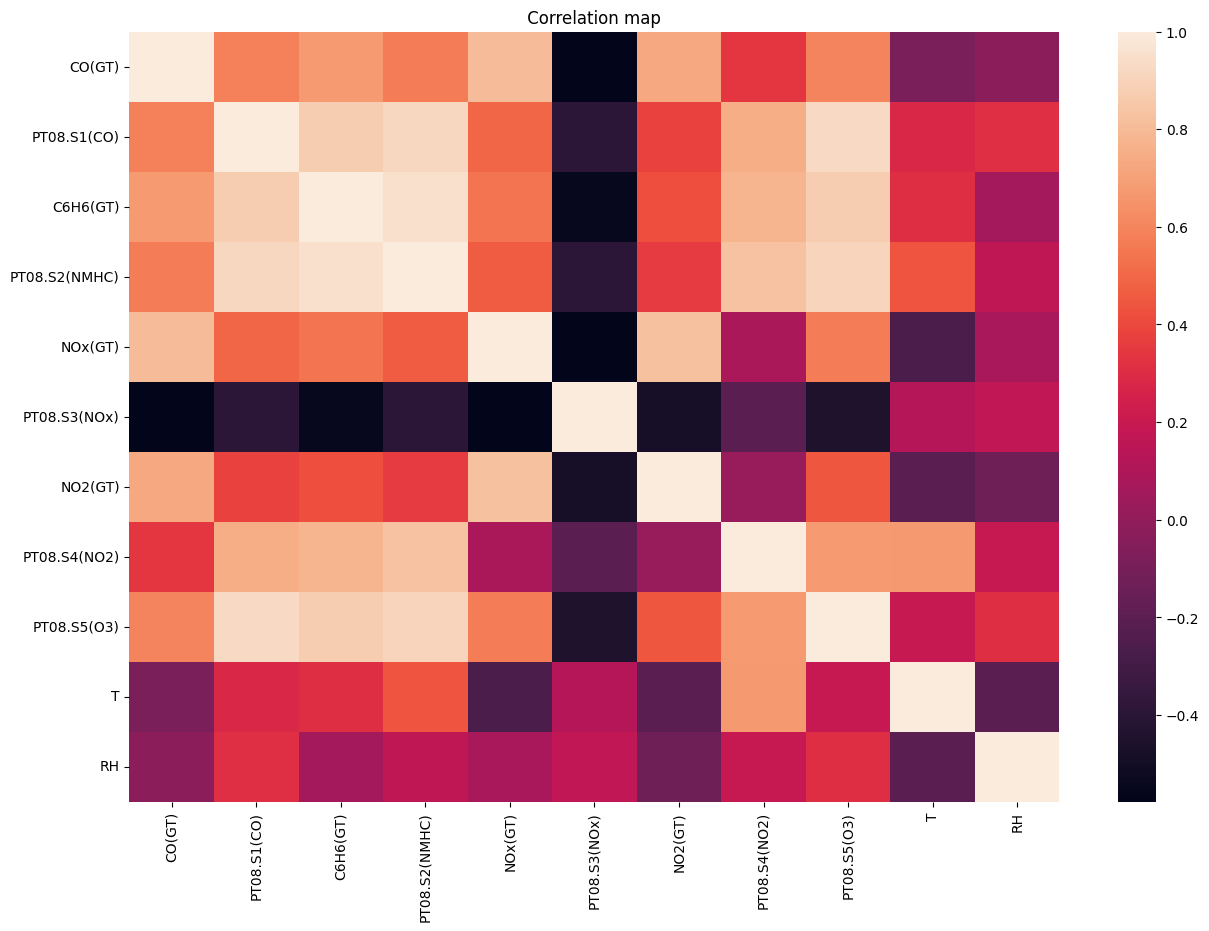

In [ ]:
plt.figure(figsize=(15 , 10))
sns.heatmap(data = df.corr())
plt.title(" Correlation map ")
plt.show()

In [ ]:
y = df['CO(GT)']
X = df.drop(columns=['CO(GT)'])

In [ ]:
X, y

(      PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...  PT08.S5(O3)     T    RH
 0            1360      11.9           1046  ...       1268.0  13.6  48.9
 1            1292       9.4            955  ...        972.0  13.3  47.7
 2            1402       9.0            939  ...       1074.0  11.9  54.0
 3            1376       9.2            948  ...       1203.0  11.0  60.0
 4            1272       6.5            836  ...       1110.0  11.2  59.6
 ...           ...       ...            ...  ...          ...   ...   ...
 9352         1314      13.5           1101  ...       1729.0  21.9  29.3
 9353         1163      11.4           1027  ...       1269.0  24.3  23.7
 9354         1142      12.4           1063  ...       1092.0  26.9  18.3
 9355         1003       9.5            961  ...        770.0  28.3  13.5
 9356         1071      11.9           1047  ...        816.0  28.5  13.1
 
 [9318 rows x 10 columns],
 0       2.6
 1       2.0
 2       2.2
 3       2.2
 4       1.6
        ... 
 9352

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X , y, test_size=0.2, random_state=30)

In [ ]:
Scaler = StandardScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)


In [ ]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
y_pred ,  y_test

(array([0.62582305, 3.59996885, 2.06871291, ..., 0.64459208, 2.08366146,
        5.03273998]),
 1940    0.1
 5112    3.8
 6843    3.7
 219     4.0
 4394    3.6
        ... 
 8788    0.8
 711     2.7
 9200    0.8
 5646    3.2
 8139    5.2
 Name: CO(GT), Length: 1864, dtype: float64)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.39389291737337156

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8110632089043845

# new model

In [ ]:
X2 , y2 = df.drop(columns=['CO(GT)', 'T', 'RH']), df['CO(GT)']

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X2 , y2, test_size=0.2, random_state=30)

In [ ]:
Scaler = StandardScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)


In [ ]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
y_pred ,  y_test

(array([0.64472619, 3.72461729, 1.91070277, ..., 0.87444157, 2.19119784,
        5.20755375]),
 1940    0.1
 5112    3.8
 6843    3.7
 219     4.0
 4394    3.6
        ... 
 8788    0.8
 711     2.7
 9200    0.8
 5646    3.2
 8139    5.2
 Name: CO(GT), Length: 1864, dtype: float64)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8030390474385154

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.41062158282247746